# Canonical Discriminant Analysis (CANDISC)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement de la base
import pandas as pd
DTrain = pd.read_excel("./data/vin_bordelais.xls",header=0,index_col=0)
DTrain.head(6)

,Annee,Temperature,Soleil,Chaleur,Pluie,Qualite
Obs.,,,,,,
1,1924,3064,1201,10,361,Moyen
2,1925,3000,1053,11,338,Mediocre
3,1926,3155,1133,19,393,Moyen
4,1927,3085,970,4,467,Mediocre
5,1928,3245,1258,36,294,Bon
6,1929,3267,1386,35,225,Bon


> Set annee to index

In [3]:
DTrain = DTrain.set_index("Annee")
DTrain.head(6)

,Temperature,Soleil,Chaleur,Pluie,Qualite
Annee,,,,,
1924,3064,1201,10,361,Moyen
1925,3000,1053,11,338,Mediocre
1926,3155,1133,19,393,Moyen
1927,3085,970,4,467,Mediocre
1928,3245,1258,36,294,Bon
1929,3267,1386,35,225,Bon


In [4]:
from discrimintools import CANDISC

In [5]:
candisc = CANDISC(n_components=2,target=["Qualite"],priors="prop",parallelize=False)
# Entraînement
candisc.fit(DTrain)

CANDISC(n_components=2, priors='prop', target=['Qualite'])

In [6]:
candisc.transform(DTrain).head(6)

,LD1,LD2
Annee,,
1924,0.882552,0.871537
1925,2.325456,0.094220
1926,0.994856,-0.832957
1927,2.726862,-0.247244
1928,-0.743596,-1.721167
1929,-2.230889,-0.484319


### Individus supplémentaires

In [7]:
## Inidvidu supplémentaire
XTest = pd.DataFrame({"Temperature" : 3000, "Soleil" : 1100, "Chaleur" : 20, "Pluie" : 300},index=[1958])
XTest

,Temperature,Soleil,Chaleur,Pluie
1958,3000,1100,20,300


In [8]:
candisc.transform(XTest)

,LD1,LD2
1958,2.027679,-0.569395


In [9]:
candisc.decision_function(XTest)

,Bon,Mediocre,Moyen
1958,-7.56466,1.114437,-1.859627


In [10]:
candisc.predict_proba(XTest)

,Bon,Mediocre,Moyen
1958,0.000162,0.951235,0.048604


## Fonctions de décision

In [11]:
from discrimintools import get_candisc_coef
score_coef = get_candisc_coef(candisc,choice="score")
score_coef

,Bon,Mediocre,Moyen
Temperature,0.018164,-0.017821,0.001277
Soleil,0.012925,-0.015263,0.003726
Chaleur,-0.022716,0.084484,-0.069449
Pluie,-0.010768,0.013562,-0.004026
intercept,-72.590473,65.609287,-7.191833


In [12]:
XTrain = DTrain.drop(columns=["Qualite"])

In [13]:
candisc.decision_function(XTrain).head()

,Bon,Mediocre,Moyen
Annee,,,
1924,-5.526406,-1.585276,-0.952740
1925,-8.376910,1.586807,-1.562690
1926,-5.301410,-0.974760,-1.843753
1927,-9.135866,2.496957,-1.796625
1928,-1.371053,-4.392974,-2.045149


In [14]:
candisc.predict_proba(XTrain).head()

,Bon,Mediocre,Moyen
Annee,,,
1924,0.006695,0.344613,0.648692
1925,0.000045,0.958846,0.041109
1926,0.009222,0.698039,0.292739
1927,0.000009,0.986519,0.013472
1928,0.641715,0.031256,0.327029


In [15]:
candisc.predict(XTrain).head()

Annee
1924       Moyen
1925    Mediocre
1926    Mediocre
1927    Mediocre
1928         Bon
Name: prediction, dtype: object

In [16]:
# score 
candisc.score(XTrain,DTrain["Qualite"])

0.7941176470588235

In [17]:
# Prediction table
candisc.pred_table()

prediction,Bon,Mediocre,Moyen
Qualite,,,
Bon,9,0,2
Mediocre,0,10,2
Moyen,2,1,8


In [18]:
from discrimintools import summaryCANDISC
summaryCANDISC(candisc,to_markdown=True)

                     Canonical Discriminant Analysis - Results                     


Summary Information

|    | infos             |   Value | DF                 |   DF value |
|---:|:------------------|--------:|:-------------------|-----------:|
|  0 | Total Sample Size |      34 | DF Total           |         33 |
|  1 | Variables         |       4 | DF Within Classes  |         31 |
|  2 | Classes           |       3 | DF Between Classes |          2 |

Class Level information

|               |   Frequency |   Proportion |   Prior Probability |
|:--------------|------------:|-------------:|--------------------:|
| ('Mediocre',) |          12 |     0.352941 |            0.352941 |
| ('Bon',)      |          11 |     0.323529 |            0.323529 |
| ('Moyen',)    |          11 |     0.323529 |            0.323529 |

Importance of components
|                      |    LD1 |     LD2 |
|:---------------------|-------:|--------:|
| Variance             |  3.279 |   0.139 |
| Differe

## Individuals Factor Map

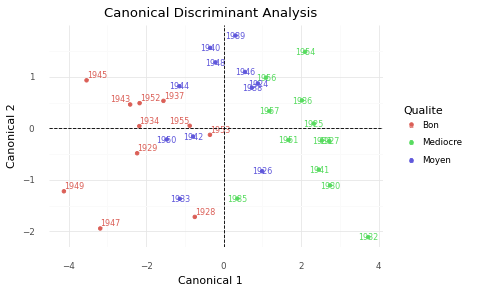

In [19]:
from discrimintools import fviz_candisc
p = fviz_candisc(candisc,repel=True)
print(p)